<a href="https://colab.research.google.com/github/zg104/Machine-Learning/blob/master/KNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset Using KNN 

In [202]:
# import the libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')

In [203]:
# import some data to play with
iris = datasets.load_iris()
y = iris.target

In [204]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [205]:
colnames = [
  'sepal_length',
  'sepal_width',
  'petal_length',
  'petal_width'
]
data = pd.DataFrame(iris.data, columns=colnames)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [206]:
data['class'] = y
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [207]:
# we transform the numbers [0,1,2] into strings to make it understandable
data['class'] = data['class'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [208]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [209]:
data['class'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: class, dtype: int64

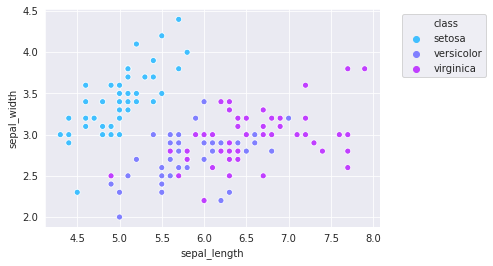

In [210]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'class', data = data, palette='cool')
plt.legend(bbox_to_anchor=(1.05, 1))

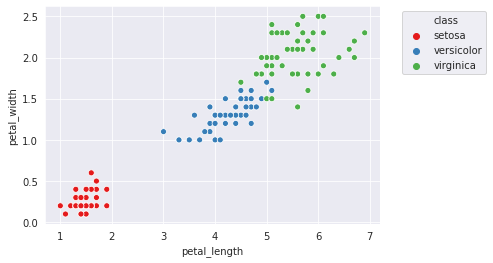

In [211]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'class', data = data, palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1))

以上图形揭示了较强的分类情况。我们观察到，setosa的花瓣很小，杂色的花瓣中等大小，而virginica的花瓣最大。此外，setosas的萼片似乎比其他两个类别的更短和更宽。即使没有使用算法，我们也设法直观地构造了一个分类器，该分类器在数据集上的表现非常出色。

现在，该让我们湿透了。我们将使用scikit-learn训练 KNN 分类器，并使用4步在数据集上评估其性能：

- Import the learning algorithm
- Instantiate the model
- Learn the model
- Predict the response

In [212]:
X = data.drop('class',axis = 1)
y = data['class']

In [213]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

最后，按照上述建模模式，我们定义分类器（在本例中为KNN），使其适合我们的训练数据并评估其准确性。我们将使用任意K，但稍后将了解如何使用交叉验证来找到其最佳值。

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 0.98


In [215]:
print(confusion_matrix(y_true = y_test, y_pred = pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [216]:
print(classification_report(y_true = y_test, y_pred = pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## 超参数调节

在本节中，我们将探讨一种可用于调整超参数K的方法。

显然，最好的 K 是与最低测试错误率相对应的K，所以让我们假设针对不同的K值对测试误差进行重复测量。无意间，我们正在做的就是将测试集用作训练集。 ！这意味着我们低估了真实的错误率，因为我们的模型被迫以最佳方式拟合测试集。这样，我们的模型就无法推广到较新的观测值，这一过程称为过拟合。



> Using the test set for hyperparameter tuning can lead to overfitting.

另一种更聪明的方法涉及通过从拟合过程中排除训练集的子集来估计测试错误率。此子集称为验证集，可用于选择更合适的算法灵活度！在这里我们使用k折交叉验证（k-fold cross validation）

<p align="center">
	  <img 		src="https://kevinzakka.github.io/assets/knn/k-fold.png">
</p>

如图中所示，k折交叉验证（k完全与K不相关）将训练集随机分为k组或近似相等大小的折叠。将第一折视为验证集，该方法适用于其余k-1折。然后根据保留的折叠中的观察值计算错误分类率。此过程重复k次；每次，将不同的观察组视为验证集。该过程导致测试误差的k个估计，然后取其平均。



> Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.



In [217]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 27


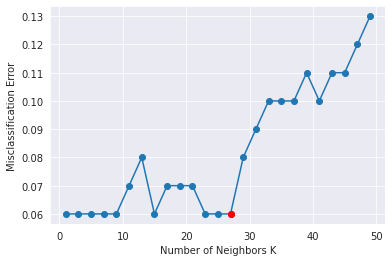

In [218]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

def find_min_idx(x):
  vector = []
  for i, j in enumerate(x):
    if j == min(mse):
        vector.append(i)
  return max(vector)

# determining best k
optimal_k = neighbors[find_min_idx(mse)]
optimal_mse = min(mse)
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse, marker = 'o')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.plot(optimal_k,optimal_mse,'ro') 
plt.show()

10 折交叉验证告诉我们，K = 27得到最低的验证误差，这里我们有好几个 K 都达到了最小误差，但我们选其中较大的那个，因为相同条件下，K 越小越容易过拟合！

## 不调包写KNN

我们刚刚看了scikit-learn的KNN写法，那么我们也可以自己尝试不调包写一写。

像其他的机器学习算法一样，算法分为两部分：

- 训练：把训练集 $X$ 和 $y$ 输入形成一个模型 $h$。
- 预测：把测试集输入，并用未知的观测值来通过函数 $h$ 来预测对应的结果。



In [219]:
# KNN的训练部分只需要记忆训练集，所以不需要做任何事
def train(X_train, y_train):
    # do nothing
  return

# KNN的预测部分要包含：
# 1. 计算新的输入和其他所有训练集的点的欧氏距离
# 2. 选取K个最近的点，并且按照众数投票

def predict(X_train, y_train, x_test, k):
  distances = []
  targets = []

  # 计算欧式距离
  for i in range(len(X_train)):
    distances.append([np.sqrt(np.sum(np.square(x_test - X_train[i,:]))), i])
  # 降序排序
  distances = sorted(distances)

  for i in range(k):
    idx = distances[i][1]
    targets.append(y_train[idx])
  return Counter(targets).most_common(1)[0][0]

In [220]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
  # train on the input data
  assert k <= len(X_train), "[!] k can't be larger than number of samples."
  # assert是为了防止k大于训练集的个数
  train(X_train, y_train)

  # loop over all observations
  predictions = []
  for i in range(len(X_test)):
    predictions.append(predict(X_train, y_train, X_test[i,:], k))

  return np.asarray(predictions)

In [221]:
iris = datasets.load_iris()
X = iris.data[:,:4]
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [222]:
# making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {}".format(100*accuracy))

The accuracy of our classifier is 100.0


我们得到了百分百的准确率，这个是和分割训练集测试集的随机性相关的，但是这个准确率也是很高了